# **Understanding SNAP Utilization Patterns and Disparities: A Comprehensive Examination of Participation Trends, Geographic Variations, and Influencing Factors (2022-2024)**

## **1. Introduction**
The dataset under analysis contains detailed monthly records of SNAP (Supplemental Nutrition Assistance Program) statistics across various U.S. counties from January 2022 to June 2024. The data points include the number of individuals enrolled in SNAP, the number of active caseloads, and the total issuance amounts (in dollars) distributed within each county.

## **2. About Dataset**
- **Temporal Range**: January 2022 - June 2024
- **Geographic Scope**: Various counties across the United States
- **Individuals**: The total number of people participating in SNAP each month.
- **Caseloads**: The number of active SNAP cases, which can represent households or families.
- **Issuance Amounts**: The total dollar amount distributed through SNAP to beneficiaries.

## **3. Yearly Trends in Individuals, Caseloads, and Issuance**
**Objective**: Analyze and compare the monthly trends in the number of Individuals, Caseloads, and Issuance across the years 2022, 2023, and 2024, to identify patterns, fluctuations, and potential factors influencing these metrics over time.

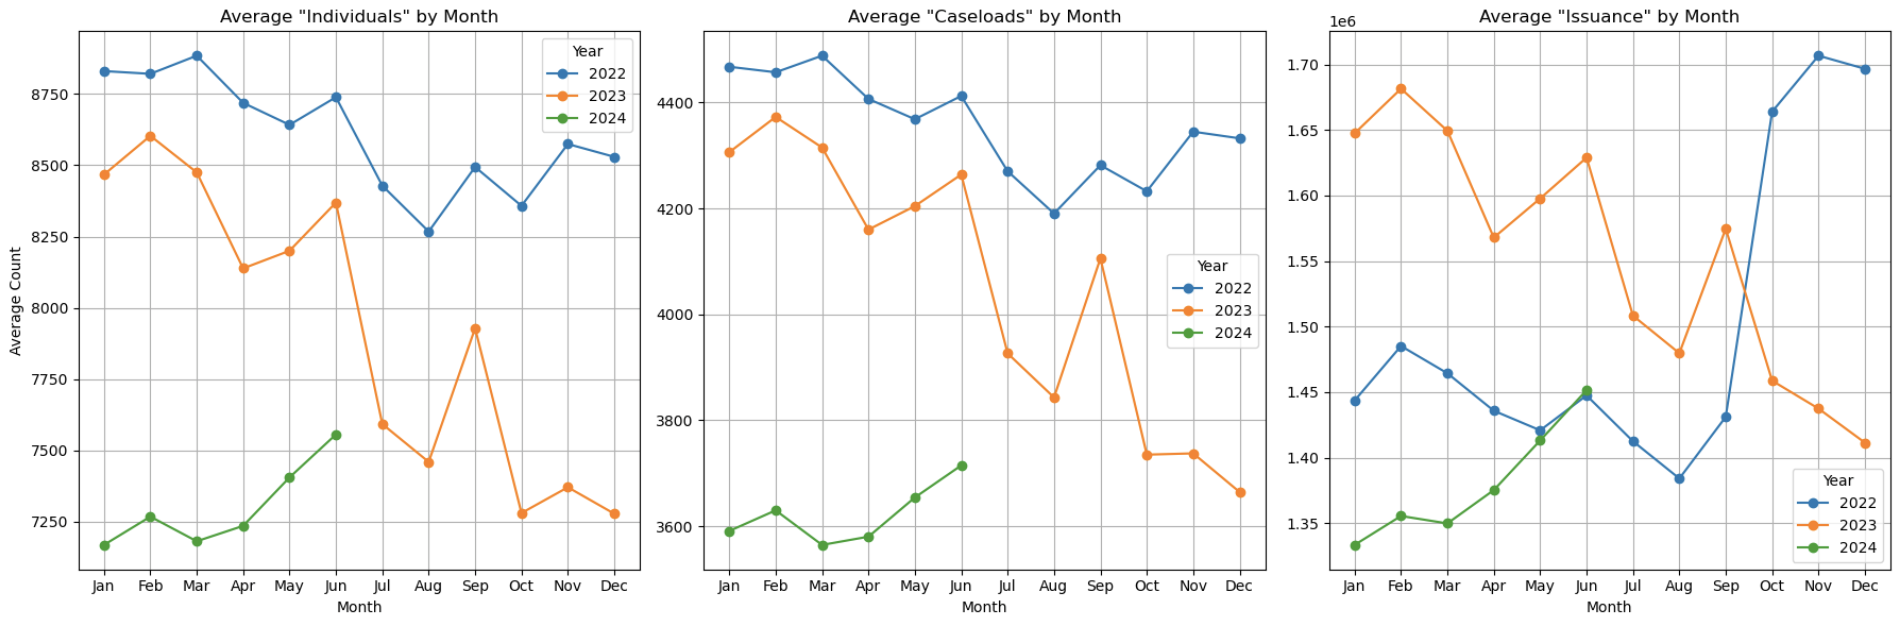

### **Interpretation**
- **Individuals**: There is a clear downward trend from 2022 to 2023, with a slight recovery or increase starting in 2024. This could indicate that fewer individuals were recorded in 2023, but there is a potential rebound or increase in 2024.
- **Caseloads**: Caseloads follow a similar trend to the "Individuals" metric, with a noticeable decline in 2023 and some recovery in 2024. This suggests a possible link between the number of individuals and caseloads over these years.
- **Issuance**: The "Issuance" metric shows the most volatility, especially in 2023. The large fluctuations could indicate changes in policy, external factors, or economic conditions affecting issuance levels. The trend in 2024 suggests a more stable issuance rate compared to 2023.

## **4. Correlation Analysis: Individuals, Caseloads, and Issuance**
**Objective**: Determine the strength and direction of the linear relationship between two or more variables

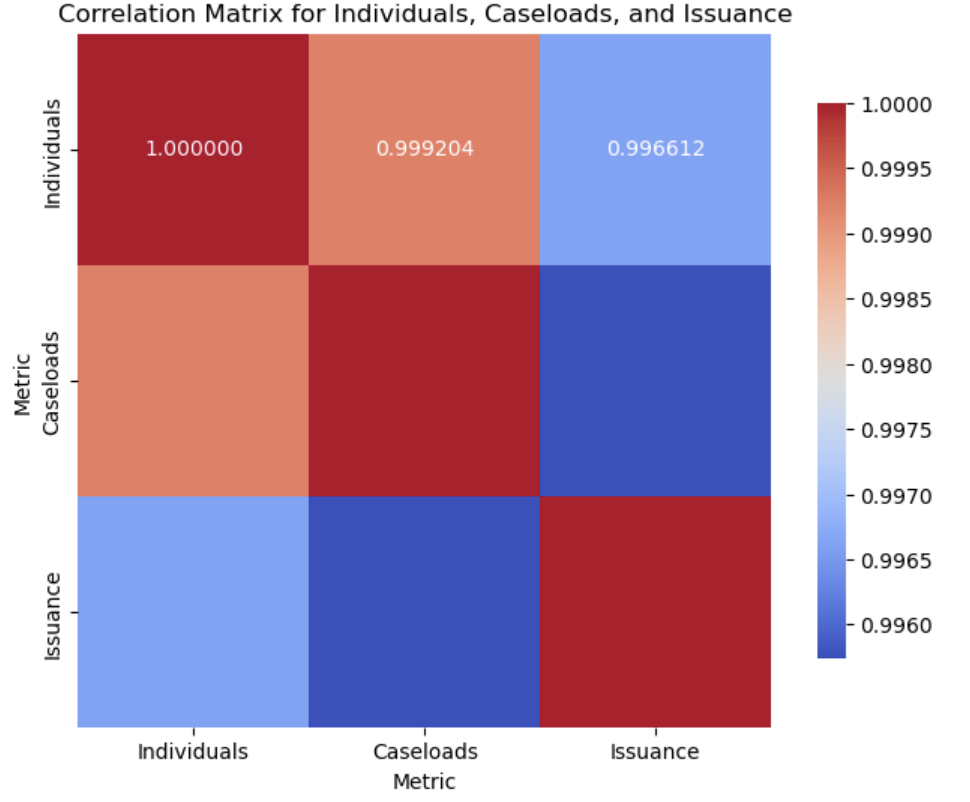

### **Interpretation**:
The correlation coefficients are all close to 1, indicating that the three metrics are strongly positively correlated. This means that increases or decreases in one metric are closely mirrored by changes in the other two.

## **5. Segmentation Analysis**
**Objective**:To group counties into distinct clusters based on their average levels of 'Individuals,' 'Caseloads,' and 'Issuance' metrics over a specified period (2022-2024), in order to identify counties with similar social service demands and to facilitate targeted resource allocation, policy-making, and program development.

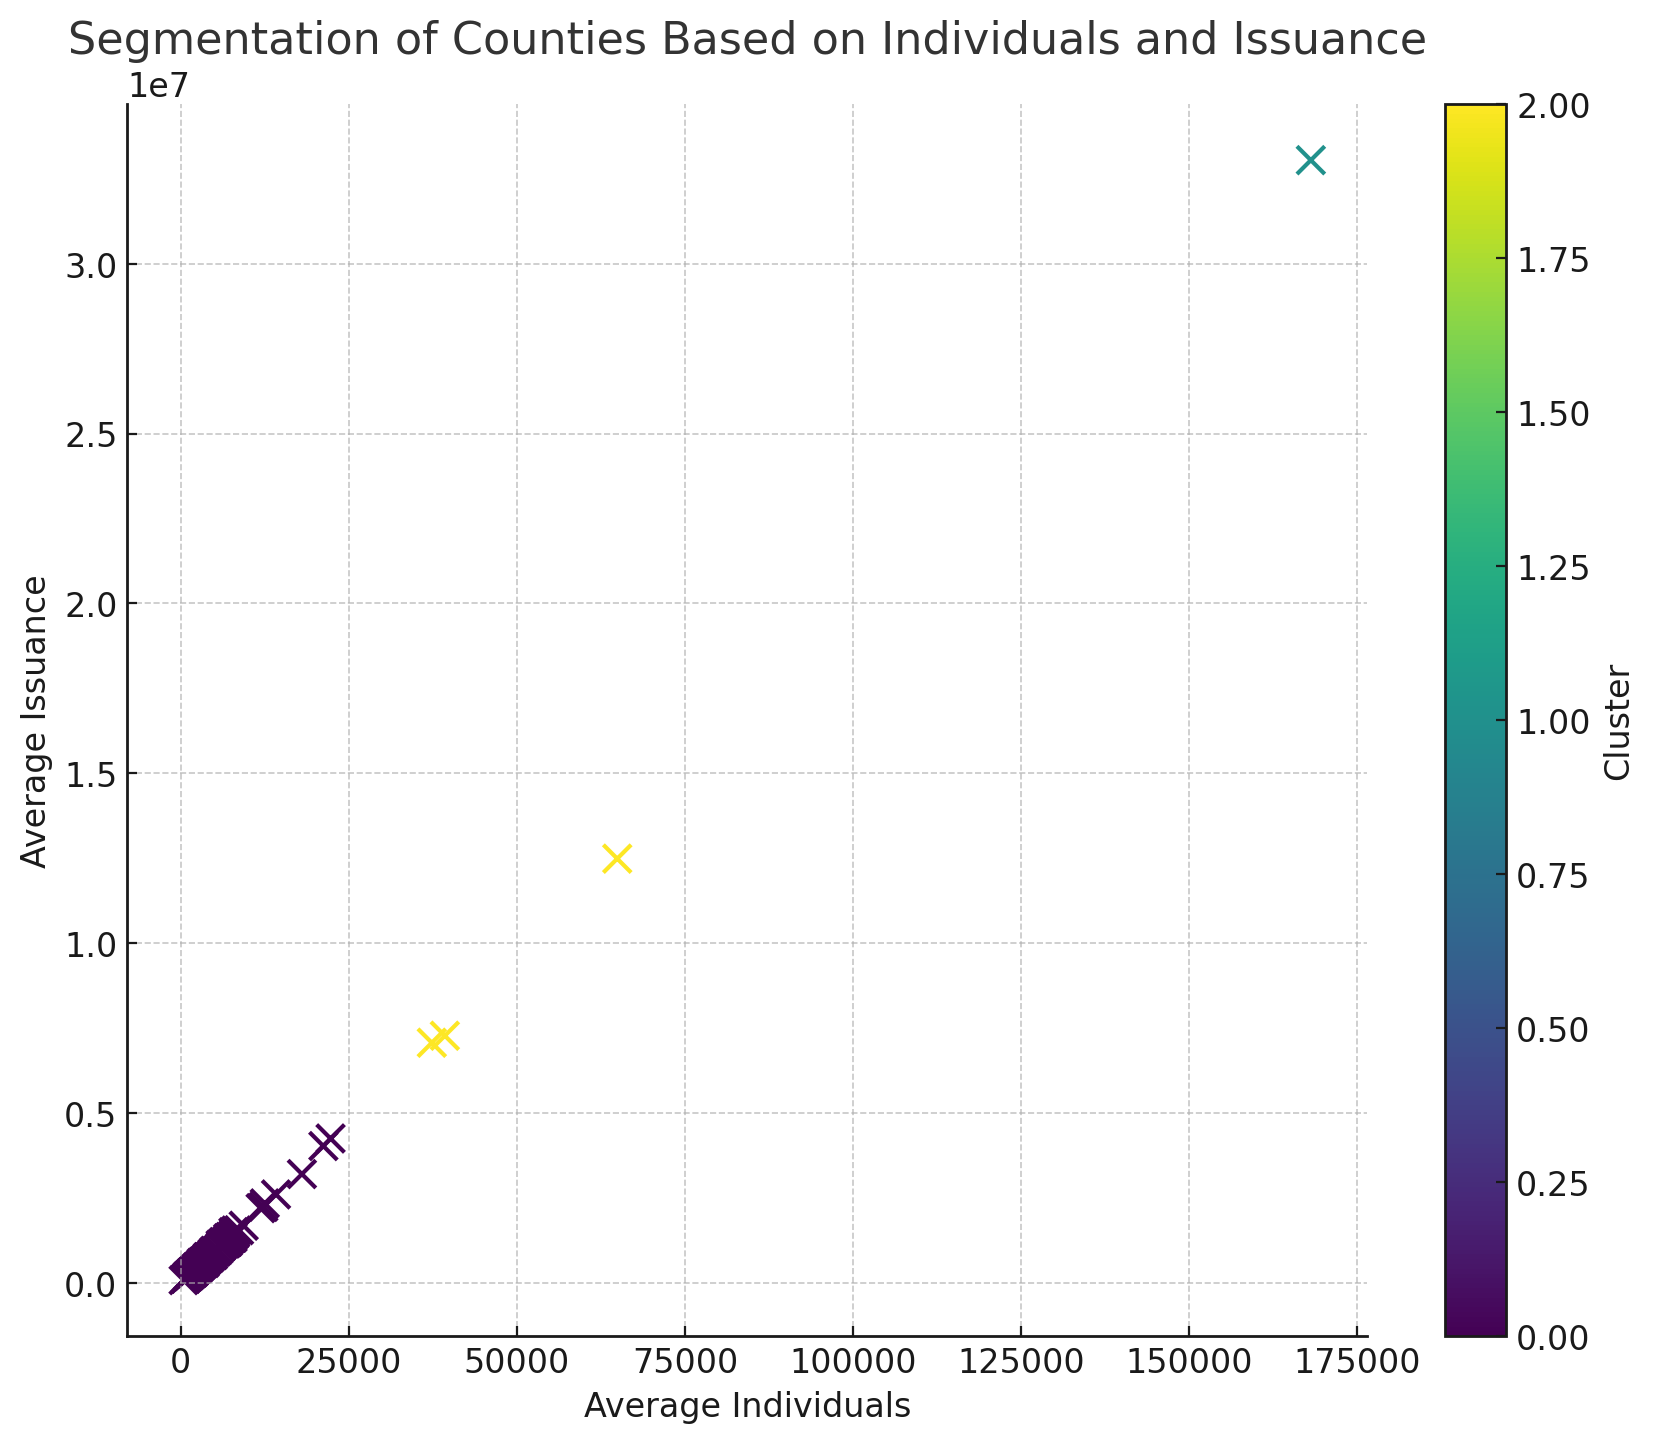
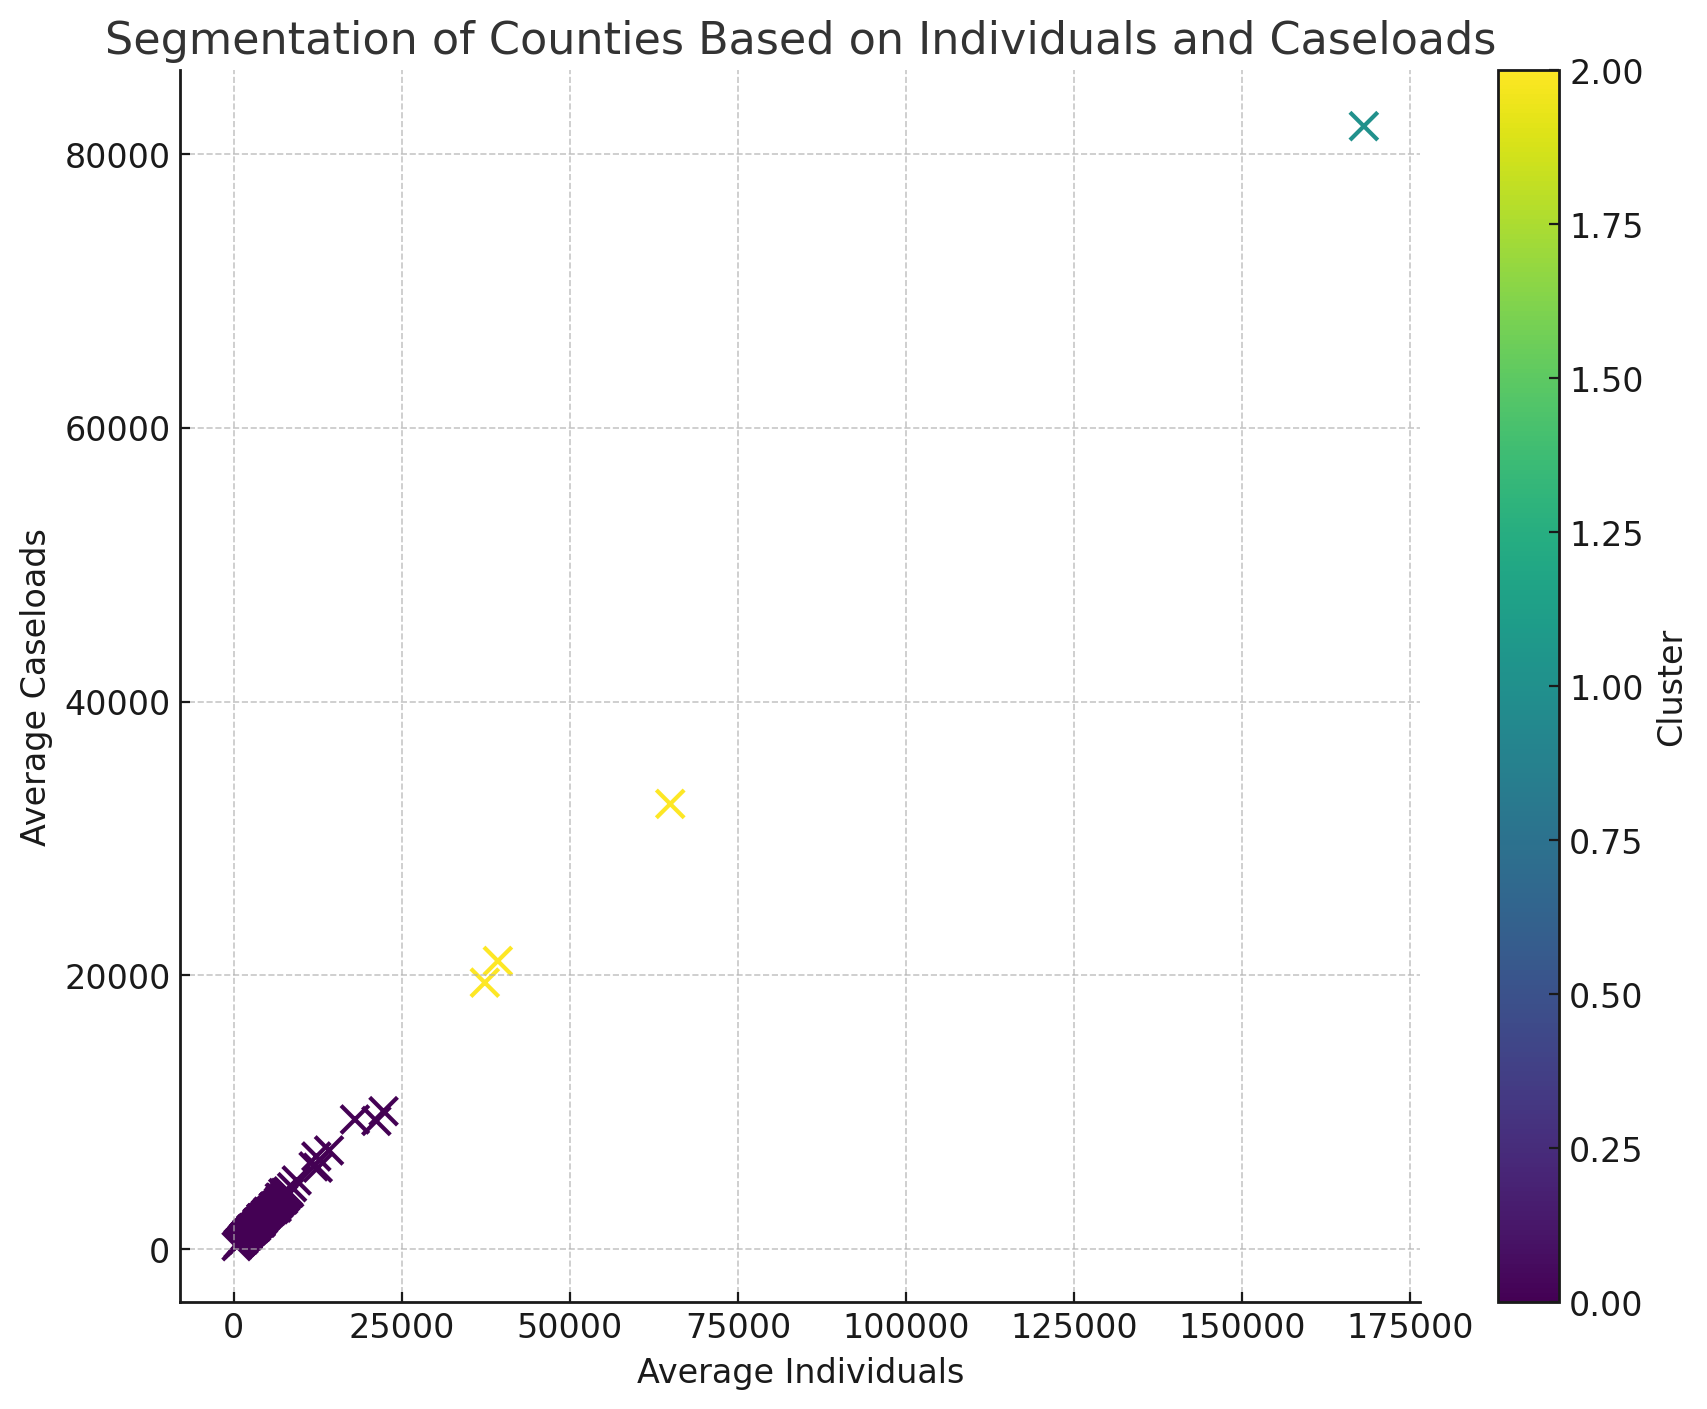

### **Interpretation**:
- **Cluster 0 (Dark Purple)**: Represents counties with low demand across all metrics (Individuals, Caseloads, and Issuance). These are likely smaller or rural counties with fewer social service needs.
- **Cluster 1 (Yellow)**: Represents counties with moderate demand, potentially suburban or moderately populated areas with moderate levels of social service engagement.
- **Cluster 2 (Teal)**: Represents high-demand counties, likely urban or highly populated areas where the need for social services and financial issuance is highest.

## **6. Regression Analysis**
**Objective**: Quantify and evaluate the relationship between the number of individuals receiving support (dependent variable) and the factors that may influence it, such as caseloads and financial issuance (independent variables), in order to understand how changes in these factors impact the number of individuals served.

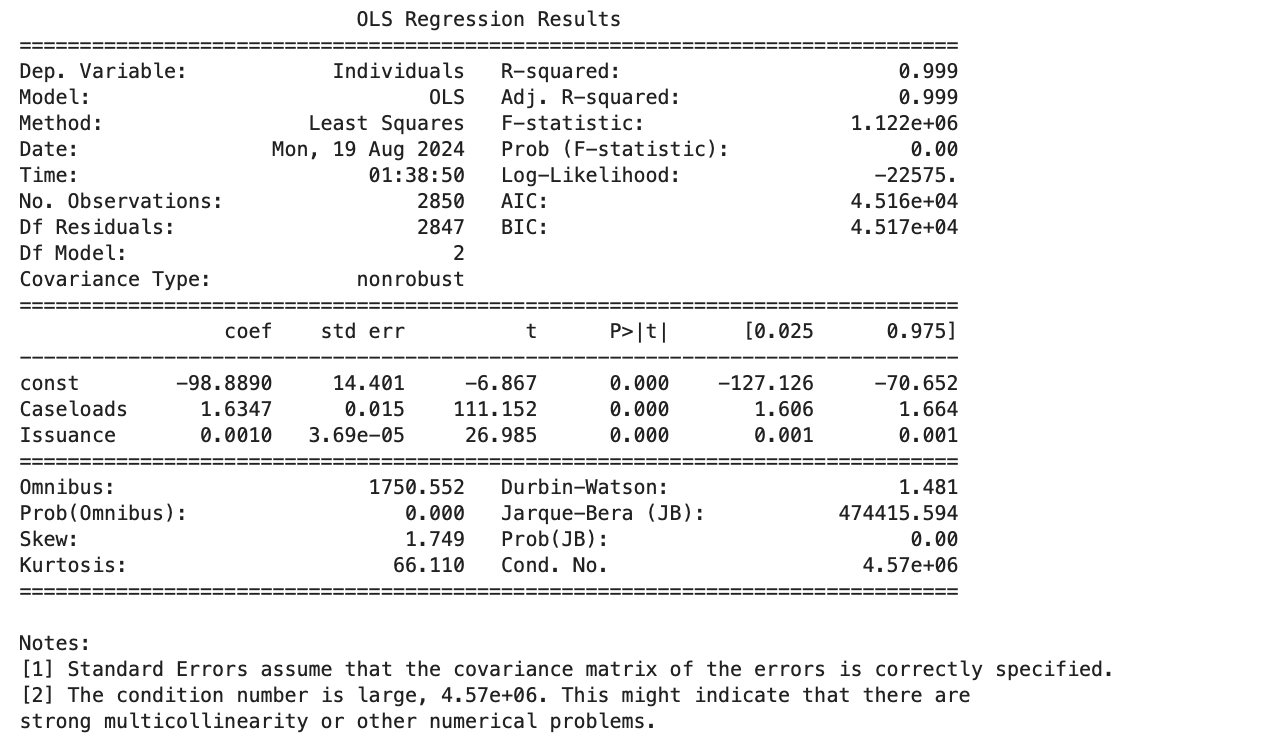

### **Interpretation**:
- **R-squared: 0.999**:The R-squared value of 0.999 indicates that 99.9% of the variance in the "Individuals" metric can be explained by the "Caseloads" and "Issuance" variables combined. This suggests a very strong relationship between these variables.
  
- **Coefficients**:
    - **Intercept (const)**: -98.8890
        This is the estimated average value of "Individuals" when both "Caseloads" and "Issuance" are zero.

    - **Caseloads Coefficient**: 1.6347
        For every one-unit increase in "Caseloads," the number of "Individuals" is expected to increase by approximately 1.63            units, assuming "Issuance" remains constant. This coefficient is highly significant with a p-value of 0.000.

    - **Issuance Coefficient**: 0.0010
        For every one-unit increase in "Issuance," the number of "Individuals" is expected to increase by approximately 0.001            units, assuming "Caseloads" remain constant. This coefficient is also highly significant with a p-value of 0.000.

- **P-values**: Both "Caseloads" and "Issuance" have p-values of 0.000, indicating that their relationship with "Individuals" is statistically significant.

- **Model Significance: (F-statistic: 1.122e+06, Prob: 0.00)**: The overall model is statistically significant, as indicated by the F-statistic and its associated p-value. This means that the independent variables (Caseloads and Issuance) significantly predict the dependent variable (Individuals).

## **7. Conclusion**
The analysis of social service metrics from 2022 to 2024 reveals significant insights into the trends, correlations, and regional segmentation of service demand. Both the number of Individuals and Caseloads exhibited a clear decline in 2023, likely due to external factors such as policy changes or economic conditions, with a slight recovery observed in 2024. Issuance showed the most volatility during this period, stabilizing in 2024. The strong positive correlation between these metrics underscores their interdependence, indicating that changes in one are closely mirrored by changes in the others. Additionally, segmentation of counties identified three distinct clusters: low-demand rural areas, moderate-demand suburban regions, and high-demand urban centers. These findings highlight the need for targeted resource allocation and policy adjustments to address the varying needs across different regions and time periods.

## **Python Code**

### **Yearly Trends in Individuals, Caseloads, and Issuance**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/fariela/Downloads/SNAP Report 2022 -2024.xlsx'
xls = pd.ExcelFile(file_path)

df_new = pd.read_excel(xls, sheet_name='Sheet1')

df_melted_new = df_new.melt(id_vars=['COUNTY'], var_name='Date_Metric', value_name='Value')

df_melted_new['Metric'] = df_melted_new['Date_Metric'].apply(lambda x: x.split(' - ')[-1])
df_melted_new['Date'] = df_melted_new['Date_Metric'].apply(lambda x: ' '.join(x.split(' - ')[:-1]))

df_melted_new.drop(columns=['Date_Metric'], inplace=True)

df_pivot_new = df_melted_new.pivot_table(index=['COUNTY', 'Date'], columns='Metric', values='Value').reset_index()

df_pivot_new['Date'] = pd.to_datetime(df_pivot_new['Date'], format='%B %Y')

df_pivot_new['Month'] = df_pivot_new['Date'].dt.strftime('%b')
df_pivot_new['Year'] = df_pivot_new['Date'].dt.year

df_pivot_new['Individuals'] = pd.to_numeric(df_pivot_new['Individuals'], errors='coerce')
df_pivot_new['Caseloads'] = pd.to_numeric(df_pivot_new['Caseloads'], errors='coerce')
df_pivot_new['Issuance'] = pd.to_numeric(df_pivot_new['Issuance'], errors='coerce')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

years = df_pivot_new['Year'].unique()

for year in years:
    data = df_pivot_new[df_pivot_new['Year'] == year].groupby('Month')[['Individuals']].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[0].plot(data.index, data['Individuals'], marker='o', label=str(year))
axs[0].set_title('Average "Individuals" by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Count')
axs[0].legend(title='Year')
axs[0].grid(True)

for year in years:
    data = df_pivot_new[df_pivot_new['Year'] == year].groupby('Month')[['Caseloads']].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[1].plot(data.index, data['Caseloads'], marker='o', label=str(year))
axs[1].set_title('Average "Caseloads" by Month')
axs[1].set_xlabel('Month')
axs[1].legend(title='Year')
axs[1].grid(True)

for year in years:
    data = df_pivot_new[df_pivot_new['Year'] == year].groupby('Month')[['Issuance']].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axs[2].plot(data.index, data['Issuance'], marker='o', label=str(year))
axs[2].set_title('Average "Issuance" by Month')
axs[2].set_xlabel('Month')
axs[2].legend(title='Year')
axs[2].grid(True)

plt.tight_layout()
plt.show()

### **Correlation Analysis: Individuals, Caseloads, and Issuance**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/Users/fariela/Downloads/SNAP Report 2022 -2024.xlsx'
xls = pd.ExcelFile(file_path)

df_new = pd.read_excel(xls, sheet_name='Sheet1')

df_melted_new = df_new.melt(id_vars=['COUNTY'], var_name='Date_Metric', value_name='Value')

df_melted_new['Metric'] = df_melted_new['Date_Metric'].apply(lambda x: x.split(' - ')[-1])
df_melted_new['Date'] = df_melted_new['Date_Metric'].apply(lambda x: ' '.join(x.split(' - ')[:-1]))

df_melted_new.drop(columns=['Date_Metric'], inplace=True)

df_pivot_new = df_melted_new.pivot_table(index=['COUNTY', 'Date'], columns='Metric', values='Value').reset_index()

df_pivot_new['Date'] = pd.to_datetime(df_pivot_new['Date'], format='%B %Y')

df_pivot_new['Individuals'] = pd.to_numeric(df_pivot_new['Individuals'], errors='coerce')
df_pivot_new['Caseloads'] = pd.to_numeric(df_pivot_new['Caseloads'], errors='coerce')
df_pivot_new['Issuance'] = pd.to_numeric(df_pivot_new['Issuance'], errors='coerce')

df_corr = df_pivot_new[['Individuals', 'Caseloads', 'Issuance']]

corr_matrix = df_corr.corr()

corr_matrix.columns.name = "Metric"
corr_matrix.index.name = "Metric"

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(6), annot=True, fmt=".6f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix for Individuals, Caseloads, and Issuance")
plt.show()

### **Segmentation Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

file_path = '/Users/fariela/Downloads/SNAP Report 2022 -2024.xlsx'
xls = pd.ExcelFile(file_path)

df_new = pd.read_excel(xls, sheet_name='Sheet1')

df_melted_new = df_new.melt(id_vars=['COUNTY'], var_name='Date_Metric', value_name='Value')

df_melted_new['Metric'] = df_melted_new['Date_Metric'].apply(lambda x: x.split(' - ')[-1])
df_melted_new['Date'] = df_melted_new['Date_Metric'].apply(lambda x: ' '.join(x.split(' - ')[:-1]))

df_melted_new.drop(columns=['Date_Metric'], inplace=True)

df_pivot_new = df_melted_new.pivot_table(index=['COUNTY', 'Date'], columns='Metric', values='Value').reset_index()

df_pivot_new['Date'] = pd.to_datetime(df_pivot_new['Date'], format='%B %Y')

df_pivot_new['Individuals'] = pd.to_numeric(df_pivot_new['Individuals'], errors='coerce')
df_pivot_new['Caseloads'] = pd.to_numeric(df_pivot_new['Caseloads'], errors='coerce')
df_pivot_new['Issuance'] = pd.to_numeric(df_pivot_new['Issuance'], errors='coerce')

df_agg = df_pivot_new.groupby('COUNTY')[['Individuals', 'Caseloads', 'Issuance']].mean()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_agg)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_agg['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(df_agg['Individuals'], df_agg['Caseloads'], c=df_agg['Cluster'], cmap='viridis', s=100)
plt.title('Segmentation of Counties Based on Individuals and Caseloads')
plt.xlabel('Average Individuals')
plt.ylabel('Average Caseloads')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(df_agg['Individuals'], df_agg['Issuance'], c=df_agg['Cluster'], cmap='viridis', s=100)
plt.title('Segmentation of Counties Based on Individuals and Issuance')
plt.xlabel('Average Individuals')
plt.ylabel('Average Issuance')
plt.colorbar(label='Cluster')
plt.show()

### **Regression Analysis**

In [ ]:
import pandas as pd
import statsmodels.api as sm

file_path = '/Users/fariela/Downloads/SNAP Report 2022 -2024.xlsx'
xls = pd.ExcelFile(file_path)

df_new = pd.read_excel(xls, sheet_name='Sheet1')

df_melted_new = df_new.melt(id_vars=['COUNTY'], var_name='Date_Metric', value_name='Value')

df_melted_new['Metric'] = df_melted_new['Date_Metric'].apply(lambda x: x.split(' - ')[-1])
df_melted_new['Date'] = df_melted_new['Date_Metric'].apply(lambda x: ' '.join(x.split(' - ')[:-1]))

df_melted_new.drop(columns=['Date_Metric'], inplace=True)

df_pivot_new = df_melted_new.pivot_table(index=['COUNTY', 'Date'], columns='Metric', values='Value').reset_index()

df_pivot_new['Date'] = pd.to_datetime(df_pivot_new['Date'], format='%B %Y')

df_pivot_new['Individuals'] = pd.to_numeric(df_pivot_new['Individuals'], errors='coerce')
df_pivot_new['Caseloads'] = pd.to_numeric(df_pivot_new['Caseloads'], errors='coerce')
df_pivot_new['Issuance'] = pd.to_numeric(df_pivot_new['Issuance'], errors='coerce')

df_regression = df_pivot_new[['Individuals', 'Caseloads', 'Issuance']].dropna()

X = df_regression[['Caseloads', 'Issuance']] 
y = df_regression['Individuals'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)